<div style="direction:rtl;line-height:300%;text-align:center">
	<font face="Arial" size=8 color=black>
        Prediction of Heart Data

In [1]:
#load all Library that need in this project

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns 
import statistics as st
import matplotlib.pyplot as plt
from scipy.stats import kstest
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB , MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import BaggingClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression

#read data
df = pd.read_csv('Heart data.csv')
df

Age (age in year)  sex  chest pain  blood pressure  cholestoral   \
0                   63    1           1           145.0         233.0   
1                   37    1           3           130.0         250.0   
2                   41    0           2           130.0         204.0   
3                   56    1           2           120.0         236.0   
4                   57    0           4           120.0         354.0   
..                 ...  ...         ...             ...           ...   
592                 52    1           4           140.0         266.0   
593                 43    1           4           140.0         288.0   
594                 41    1           4           120.0         336.0   
595                 44    1           4           135.0         491.0   
596                 49    1           4           150.0         222.0   

     blood sugar  electrocardiographic   heart rate  exercise induced  \
0            1.0                    2.0       150.0               0.0   
1            0.0                    0.0       187.0               0.0   
2            0.0                    2.0       172.0               0.0   
3            0.0                    0.0       178.0               0.0   
4            0.0                    0.0       163.0               1.0   
..           ...                    ...         ...               ...   
592          0.0                    0.0       134.0               1.0   
593          0.0                    0.0       135.0               1.0   
594          0.0                    0.0       118.0               1.0   
595          0.0                    0.0       135.0               0.0   
596          0.0                    0.0       122.0               0.0   

     depression   slope   ca  thal  c  
0            2.3    3.0  0.0   6.0  0  
1            3.5    3.0  0.0   3.0  0  
2            1.4    1.0  0.0   3.0  0  
3            0.8    1.0  0.0   3.0  0  
4            0.6    1.0  0.0   3.0  0  
..           ...    ...  ...   ... ..  
592          2.0    2.0  NaN   NaN  1  
593          2.0    2.0  NaN   NaN  1  
594          3.0    2.0  NaN   NaN  1  
595          0.0    NaN  NaN   NaN  1  
596          2.0    2.0  NaN   NaN  1  

[597 rows x 14 columns]

In [3]:
#rename special col for easier call
df = df.rename(columns = {'Age (age in year)' : 'age'})
df

age  sex  chest pain  blood pressure  cholestoral   blood sugar  \
0     63    1           1           145.0         233.0          1.0   
1     37    1           3           130.0         250.0          0.0   
2     41    0           2           130.0         204.0          0.0   
3     56    1           2           120.0         236.0          0.0   
4     57    0           4           120.0         354.0          0.0   
..   ...  ...         ...             ...           ...          ...   
592   52    1           4           140.0         266.0          0.0   
593   43    1           4           140.0         288.0          0.0   
594   41    1           4           120.0         336.0          0.0   
595   44    1           4           135.0         491.0          0.0   
596   49    1           4           150.0         222.0          0.0   

     electrocardiographic   heart rate  exercise induced  depression   slope  \
0                      2.0       150.0               0.0          2.3    3.0   
1                      0.0       187.0               0.0          3.5    3.0   
2                      2.0       172.0               0.0          1.4    1.0   
3                      0.0       178.0               0.0          0.8    1.0   
4                      0.0       163.0               1.0          0.6    1.0   
..                     ...         ...               ...          ...    ...   
592                    0.0       134.0               1.0          2.0    2.0   
593                    0.0       135.0               1.0          2.0    2.0   
594                    0.0       118.0               1.0          3.0    2.0   
595                    0.0       135.0               0.0          0.0    NaN   
596                    0.0       122.0               0.0          2.0    2.0   

      ca  thal  c  
0    0.0   6.0  0  
1    0.0   3.0  0  
2    0.0   3.0  0  
3    0.0   3.0  0  
4    0.0   3.0  0  
..   ...   ... ..  
592  NaN   NaN  1  
593  NaN   NaN  1  
594  NaN   NaN  1  
595  NaN   NaN  1  
596  NaN   NaN  1  

[597 rows x 14 columns]

<div style="ine-height:300%;">
	<font face="arial" size=5 color=black>
        Data Understanding

In [5]:
#describe the data

df.describe() 

age         sex  chest pain  blood pressure  cholestoral   \
count  597.000000  597.000000  597.000000      596.000000    574.000000   
mean    51.182580    0.701843    3.072027      132.129195    248.655052   
std      9.074366    0.457833    0.965776       17.603812     59.784805   
min     28.000000    0.000000    1.000000       92.000000     85.000000   
25%     44.000000    0.000000    2.000000      120.000000    211.000000   
50%     52.000000    1.000000    3.000000      130.000000    242.500000   
75%     58.000000    1.000000    4.000000      140.000000    278.750000   
max     77.000000    1.000000    4.000000      200.000000    603.000000   

       blood sugar  electrocardiographic   heart rate  exercise induced  \
count   589.000000             596.000000  596.000000        596.000000   
mean      0.110357               0.610738  144.456376          0.315436   
std       0.313600               0.869358   23.794282          0.465080   
min       0.000000               0.000000   71.000000          0.000000   
25%       0.000000               0.000000  128.000000          0.000000   
50%       0.000000               0.000000  146.000000          0.000000   
75%       0.000000               2.000000  162.000000          1.000000   
max       1.000000               2.000000  202.000000          1.000000   

       depression        slope          ca        thal           c  
count   597.000000  407.000000  303.000000  329.000000  597.000000  
mean      0.816248    1.675676    0.693069    4.811550    0.410385  
std       1.067938    0.572758    1.049212    1.928854    0.492316  
min       0.000000    1.000000    0.000000    3.000000    0.000000  
25%       0.000000    1.000000    0.000000    3.000000    0.000000  
50%       0.200000    2.000000    0.000000    3.000000    0.000000  
75%       1.500000    2.000000    1.000000    7.000000    1.000000  
max       6.200000    3.000000    9.000000    7.000000    1.000000

In [7]:
#Correlation of features

corr = df.corr()
corr 

age       sex  chest pain  blood pressure  \
age                    1.000000 -0.062397    0.147064        0.238490   
sex                   -0.062397  1.000000    0.120748        0.010620   
chest pain             0.147064  0.120748    1.000000        0.021586   
blood pressure         0.238490  0.010620    0.021586        1.000000   
cholestoral            0.123624 -0.076399    0.104111        0.105189   
blood sugar            0.176286  0.038030    0.001428        0.136097   
electrocardiographic   0.260132 -0.034982    0.073320        0.077768   
heart rate            -0.303596 -0.088691   -0.322748       -0.117829   
exercise induced       0.155862  0.148814    0.438328        0.136658   
depression             0.253305  0.095716    0.277695        0.185216   
slope                  0.078979  0.075835    0.209141        0.126015   
ca                     0.303705  0.039879    0.227391        0.112598   
thal                   0.105296  0.349134    0.245214        0.133696   
c                      0.216430  0.268343    0.463527        0.142178   

                       cholestoral   blood sugar  electrocardiographic   \
age                        0.123624     0.176286               0.260132   
sex                       -0.076399     0.038030              -0.034982   
chest pain                 0.104111     0.001428               0.073320   
blood pressure             0.105189     0.136097               0.077768   
cholestoral                1.000000     0.054867               0.088498   
blood sugar                0.054867     1.000000               0.111847   
electrocardiographic       0.088498     0.111847               1.000000   
heart rate                -0.076064    -0.005236               0.052515   
exercise induced           0.117111     0.063431               0.071970   
depression                 0.065998     0.050842               0.175329   
slope                      0.047846     0.058897               0.032245   
ca                         0.099302     0.120773               0.093469   
thal                       0.011964     0.069128              -0.012682   
c                          0.145802     0.090071               0.137410   

                       heart rate  exercise induced  depression      slope  \
age                     -0.303596          0.155862     0.253305  0.078979   
sex                     -0.088691          0.148814     0.095716  0.075835   
chest pain              -0.322748          0.438328     0.277695  0.209141   
blood pressure          -0.117829          0.136658     0.185216  0.126015   
cholestoral             -0.076064          0.117111     0.065998  0.047846   
blood sugar             -0.005236          0.063431     0.050842  0.058897   
electrocardiographic     0.052515          0.071970     0.175329  0.032245   
heart rate               1.000000         -0.374642    -0.259880 -0.402652   
exercise induced        -0.374642          1.000000     0.426849  0.332025   
depression              -0.259880          0.426849     1.000000  0.550049   
slope                   -0.402652          0.332025     0.550049  1.000000   
ca                      -0.249563          0.165456     0.263732  0.113314   
thal                    -0.302562          0.320352     0.310069  0.286422   
c                       -0.342209          0.504280     0.481305  0.393399   

                             ca      thal         c  
age                    0.303705  0.105296  0.216430  
sex                    0.039879  0.349134  0.268343  
chest pain             0.227391  0.245214  0.463527  
blood pressure         0.112598  0.133696  0.142178  
cholestoral            0.099302  0.011964  0.145802  
blood sugar            0.120773  0.069128  0.090071  
electrocardiographic   0.093469 -0.012682  0.137410  
heart rate            -0.249563 -0.302562 -0.342209  
exercise induced       0.165456  0.320352  0.504280  
depression             0.263732  0.310069  0.481305  
slope                  0.113314  0.286422

In [9]:
#define the function for show the correlation of each feature with the target

def corr_x(dt):
    for i in dt.columns:
        if i!='c':
            x=dt[[i,"c"]]
            print(i,':\n',x.corr(),'\n') 
        
            
corr_x(df)
    

age :
          age        c
age  1.00000  0.21643
c    0.21643  1.00000 

sex :
           sex         c
sex  1.000000  0.268343
c    0.268343  1.000000 

chest pain :
             chest pain         c
chest pain    1.000000  0.463527
c             0.463527  1.000000 

blood pressure :
                 blood pressure         c
blood pressure        1.000000  0.142178
c                     0.142178  1.000000 

cholestoral  :
               cholestoral          c
cholestoral       1.000000  0.145802
c                 0.145802  1.000000 

blood sugar :
              blood sugar         c
blood sugar     1.000000  0.090071
c               0.090071  1.000000 

electrocardiographic  :
                        electrocardiographic         c
electrocardiographic                 1.00000  0.13741
c                                    0.13741  1.00000 

heart rate :
             heart rate         c
heart rate    1.000000 -0.342209
c            -0.342209  1.000000 

exercise induced :
            

In [11]:
#EDA

from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Profiling Report")
profile 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<div style="line-height:300%;">
	<font face="Arial" size=5 color=black>
        Data Preparation

<div style="line-height:300%;">
	<font face="arial" size=3 color=black>
        - Manage the noise data

In [13]:
#define the range of normal data for each feature

normalRange={'col':df.columns,
         'min':[1,0,1,80,80,0,0,50,0,0,1,0,3,0],
         'max':[200,1,4,200,600,1,2,200,1,7,3,3,7,1]}

normalRange=pd.DataFrame(normalRange)
normalRange   

col  min  max
0                     age    1  200
1                     sex    0    1
2              chest pain    1    4
3          blood pressure   80  200
4            cholestoral    80  600
5             blood sugar    0    1
6   electrocardiographic     0    2
7              heart rate   50  200
8        exercise induced    0    1
9             depression     0    7
10                  slope    1    3
11                     ca    0    3
12                   thal    3    7
13                      c    0    1

In [15]:
#define a function for detect number of noise for each feature

def detect_noise(dt):
    for i in dt.columns:
        L=normalRange.loc[normalRange['col'] == i, 'min'].values[0]
        H=normalRange.loc[normalRange['col'] == i, 'max'].values[0]

        countN=dt[(dt[i]<L) | (dt[i]>H)][i].count()
        Noises=dt[(dt[i]<L) | (dt[i]>H)][i].tolist()
        print (i,':',countN,'=>',Noises)

detect_noise(df) 

age : 0 => []
sex : 0 => []
chest pain : 0 => []
blood pressure : 0 => []
cholestoral  : 1 => [603.0]
blood sugar : 0 => []
electrocardiographic  : 0 => []
heart rate : 1 => [202.0]
exercise induced : 0 => []
depression  : 0 => []
slope : 0 => []
ca : 1 => [9.0]
thal : 0 => []
c : 0 => []


In [17]:
#define a function for transformation of noise to null

def remove_noise():
    for i in df.columns:
        L=normalRange.loc[normalRange['col'] == i, 'min'].values[0]
        H=normalRange.loc[normalRange['col'] == i, 'max'].values[0]
        
        df[i] = df[i].apply(lambda x: np.NaN if x < L or x > H else x)
        
remove_noise()  
df

age  sex  chest pain  blood pressure  cholestoral   blood sugar  \
0     63    1           1           145.0         233.0          1.0   
1     37    1           3           130.0         250.0          0.0   
2     41    0           2           130.0         204.0          0.0   
3     56    1           2           120.0         236.0          0.0   
4     57    0           4           120.0         354.0          0.0   
..   ...  ...         ...             ...           ...          ...   
592   52    1           4           140.0         266.0          0.0   
593   43    1           4           140.0         288.0          0.0   
594   41    1           4           120.0         336.0          0.0   
595   44    1           4           135.0         491.0          0.0   
596   49    1           4           150.0         222.0          0.0   

     electrocardiographic   heart rate  exercise induced  depression   slope  \
0                      2.0       150.0               0.0          2.3    3.0   
1                      0.0       187.0               0.0          3.5    3.0   
2                      2.0       172.0               0.0          1.4    1.0   
3                      0.0       178.0               0.0          0.8    1.0   
4                      0.0       163.0               1.0          0.6    1.0   
..                     ...         ...               ...          ...    ...   
592                    0.0       134.0               1.0          2.0    2.0   
593                    0.0       135.0               1.0          2.0    2.0   
594                    0.0       118.0               1.0          3.0    2.0   
595                    0.0       135.0               0.0          0.0    NaN   
596                    0.0       122.0               0.0          2.0    2.0   

      ca  thal  c  
0    0.0   6.0  0  
1    0.0   3.0  0  
2    0.0   3.0  0  
3    0.0   3.0  0  
4    0.0   3.0  0  
..   ...   ... ..  
592  NaN   NaN  1  
593  NaN   NaN  1  
594  NaN   NaN  1  
595  NaN   NaN  1  
596  NaN   NaN  1  

[597 rows x 14 columns]

<div style="line-height:300%;">
	<font face="arial" size=3 color=black>
        - Manage the Outliers

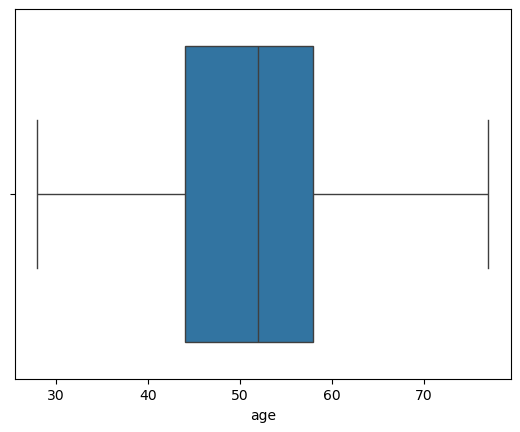

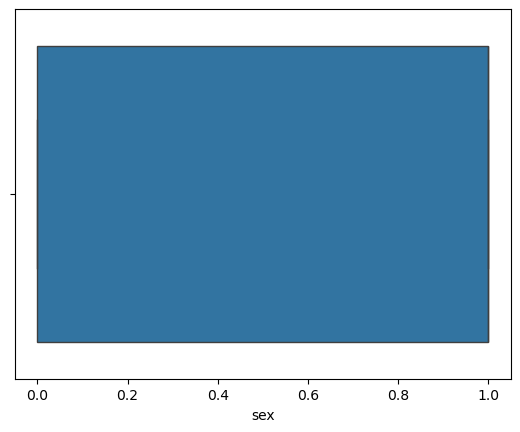

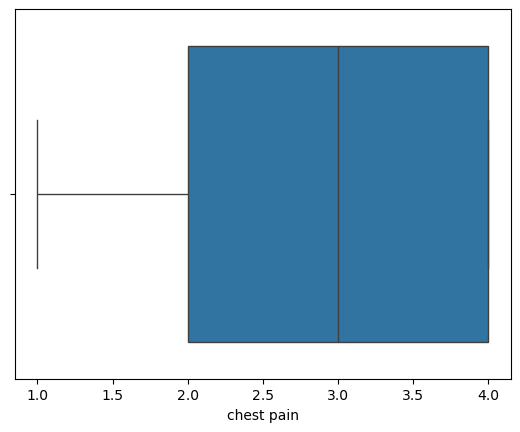

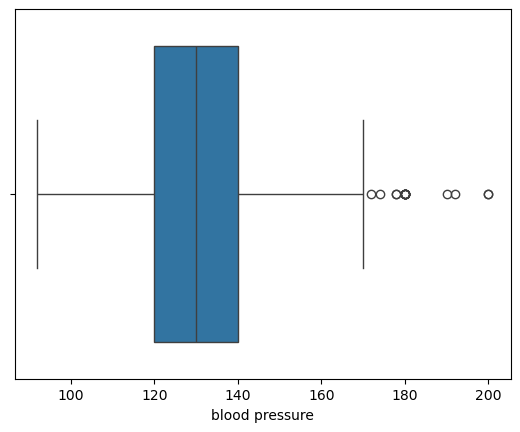

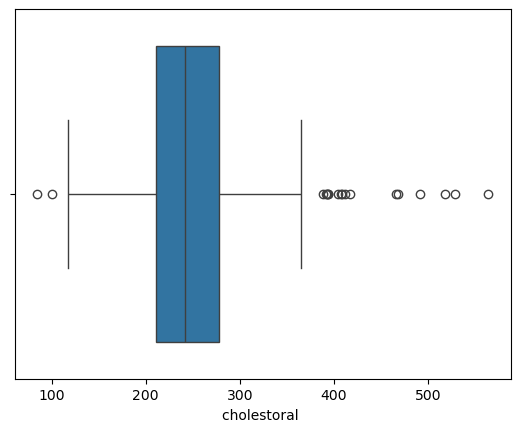

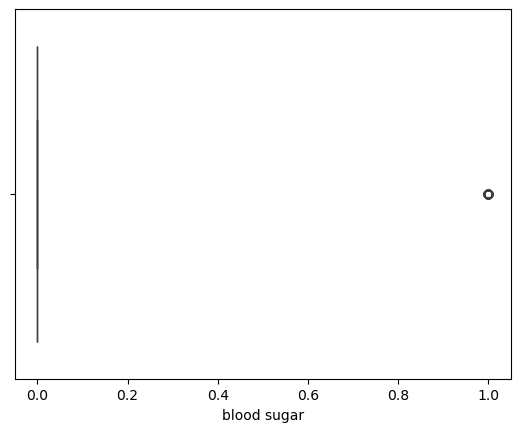

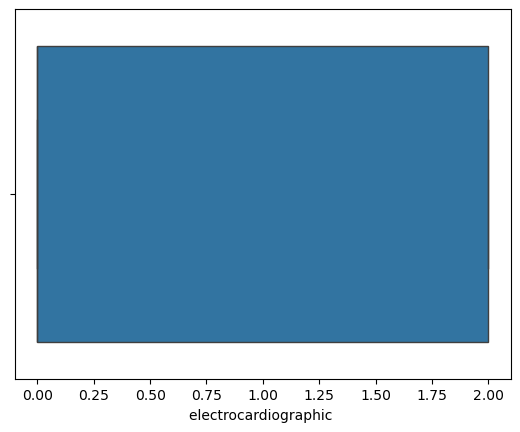

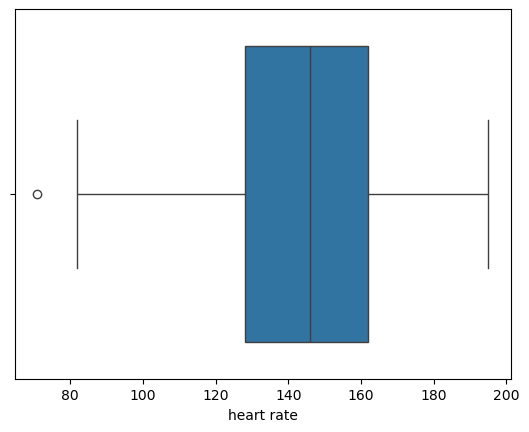

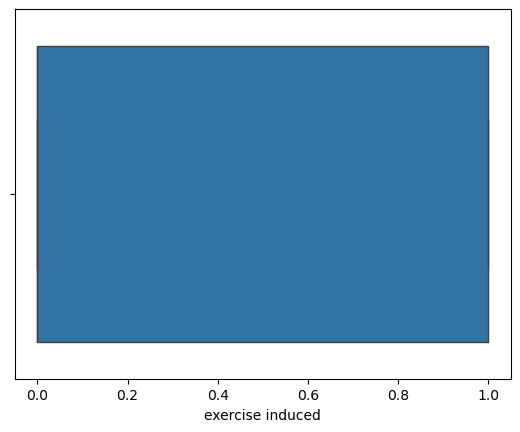

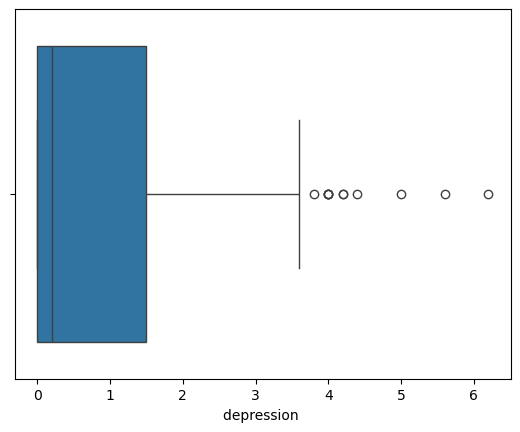

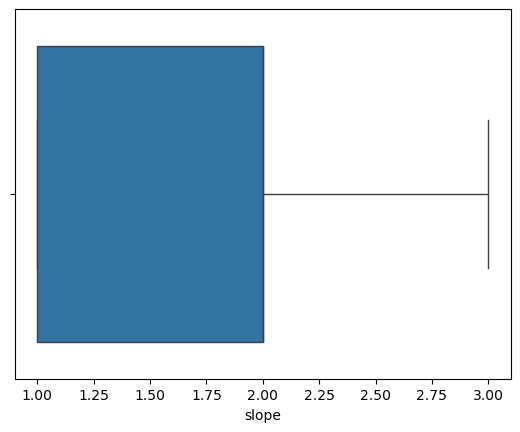

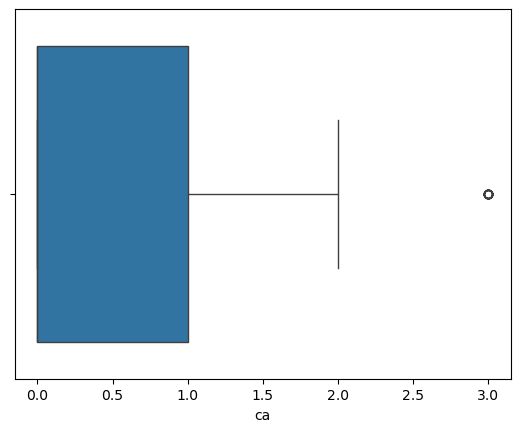

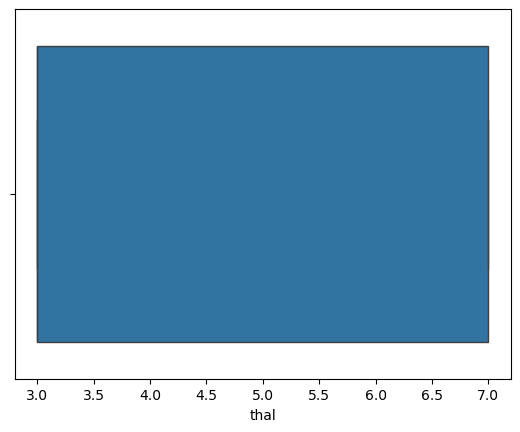

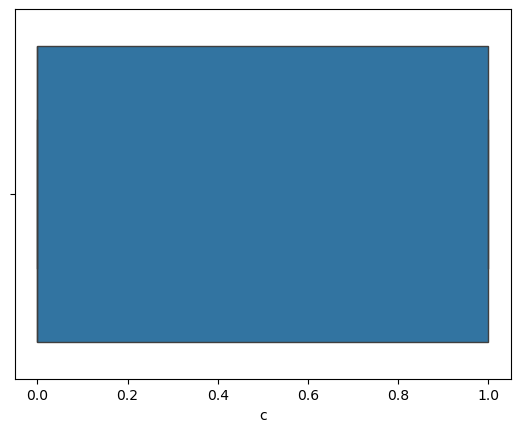

In [19]:
#define a function for detect outliers by boxplot

def boxPlot_Outlier(dt):
    for i in dt.columns:
        sns.boxplot(x = df[i])
        plt.show()
        
boxPlot_Outlier(df) 

In [21]:
#define a function for detect of outliers by Zscore and IQR

def detect_outlier(dt):
    for i in dt.columns:
        if (dt[i].dtypes == 'int64') | (dt[i].dtypes == float):
            q1 = dt[i].quantile(0.25)
            q3 = dt[i].quantile(0.75)
            iqr = q3-q1
            Lower_tail = q1 - 1.5 * iqr
            Upper_tail = q3 + 1.5 * iqr
            CountIqr=dt[(dt[i] < Lower_tail) | (dt[i] > Upper_tail)].shape[0]
        
            L = dt[i].median() - 3 * dt[i].std()
            U = dt[i].median() + 3 * dt[i].std()
            CountZ= dt[(dt[i]<L) | (dt[i]>U)].shape[0] 
            
            print(i,'\n IQR: ',CountIqr,'\n Zscore: ',CountZ,'\n *****')
        
        
detect_outlier(df)                        

age 
 IQR:  0 
 Zscore:  0 
 *****
sex 
 IQR:  0 
 Zscore:  0 
 *****
chest pain 
 IQR:  0 
 Zscore:  0 
 *****
blood pressure 
 IQR:  17 
 Zscore:  4 
 *****
cholestoral  
 IQR:  18 
 Zscore:  7 
 *****
blood sugar 
 IQR:  65 
 Zscore:  65 
 *****
electrocardiographic  
 IQR:  0 
 Zscore:  0 
 *****
heart rate 
 IQR:  1 
 Zscore:  1 
 *****
exercise induced 
 IQR:  0 
 Zscore:  0 
 *****
depression  
 IQR:  11 
 Zscore:  16 
 *****
slope 
 IQR:  0 
 Zscore:  0 
 *****
ca 
 IQR:  20 
 Zscore:  20 
 *****
thal 
 IQR:  0 
 Zscore:  0 
 *****
c 
 IQR:  0 
 Zscore:  0 
 *****


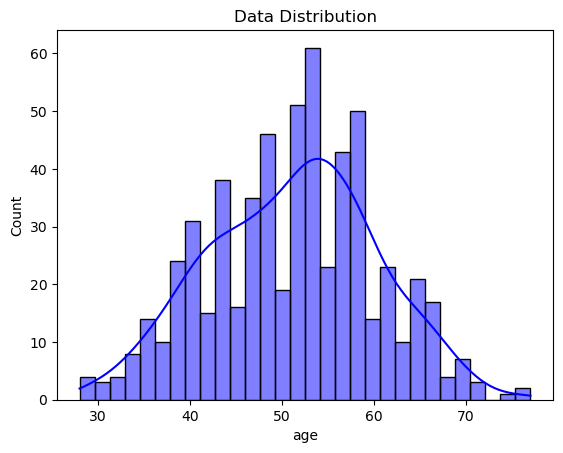

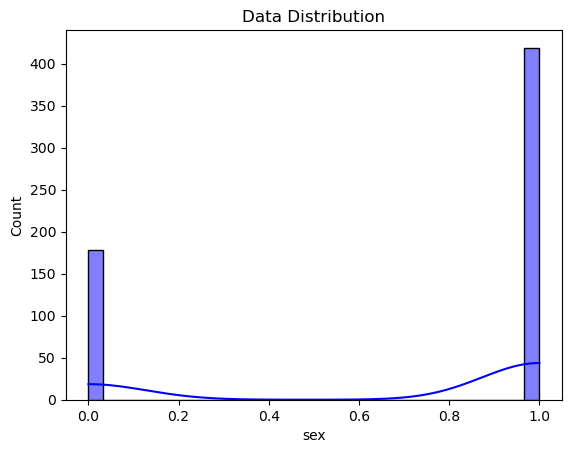

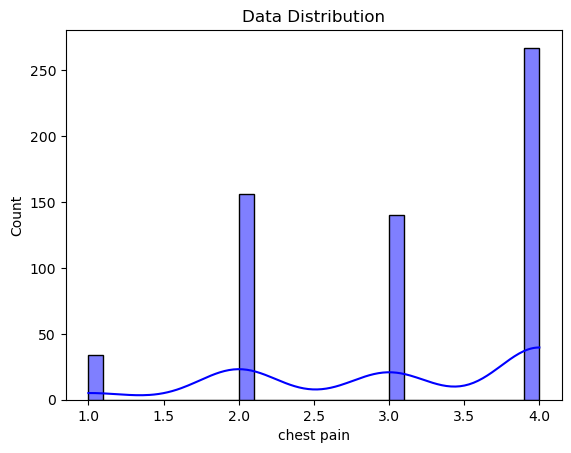

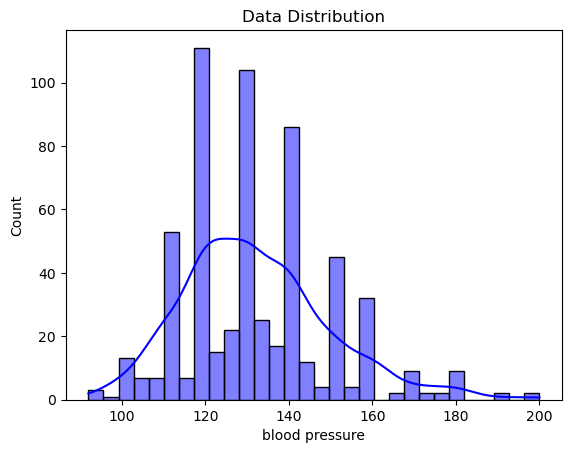

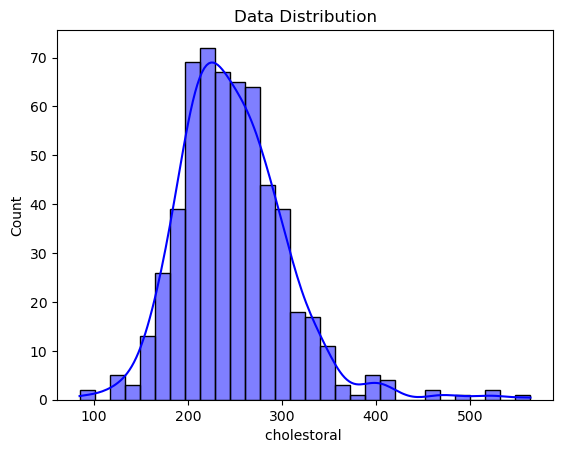

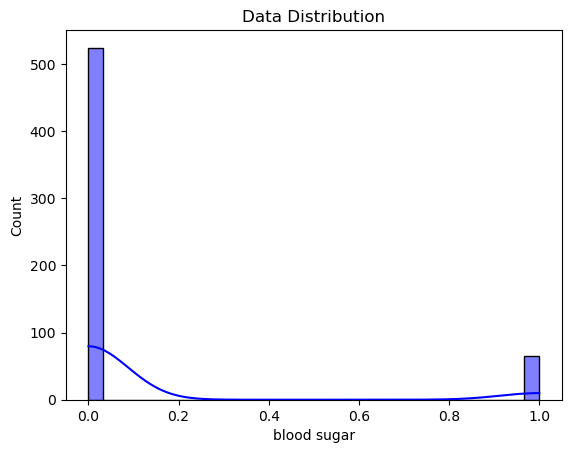

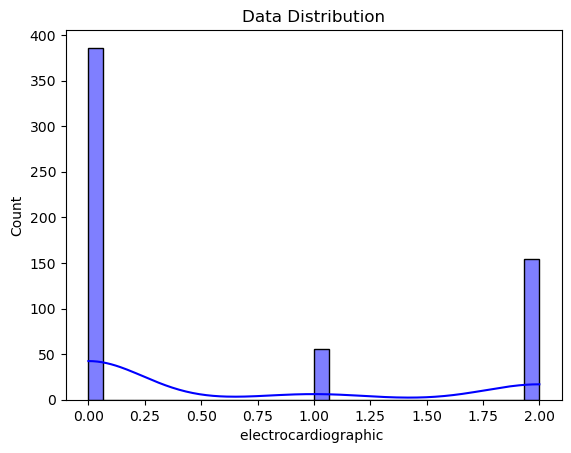

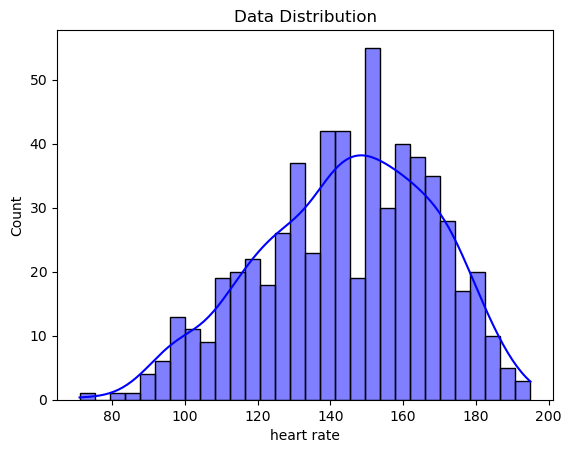

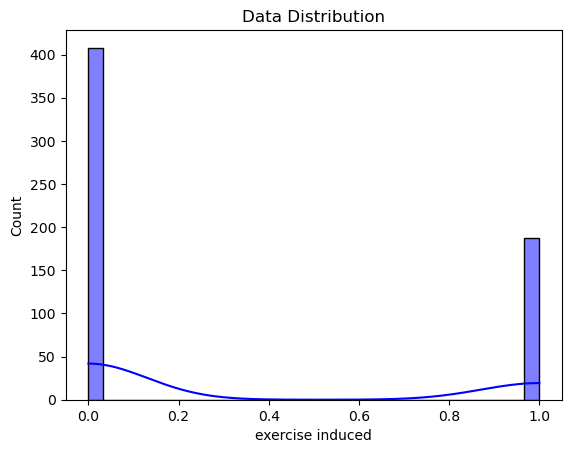

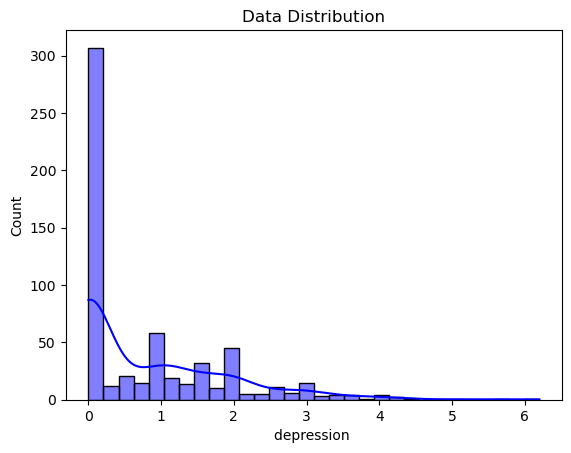

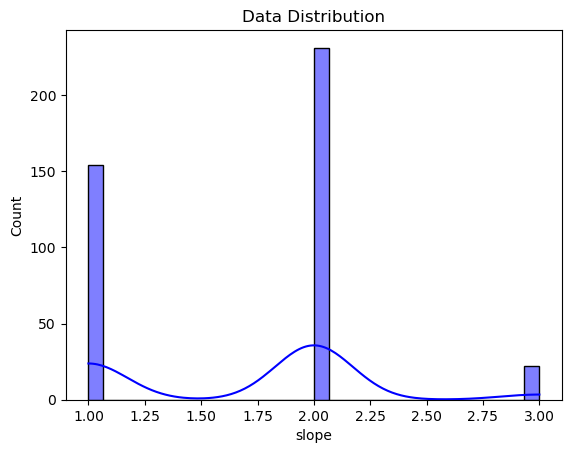

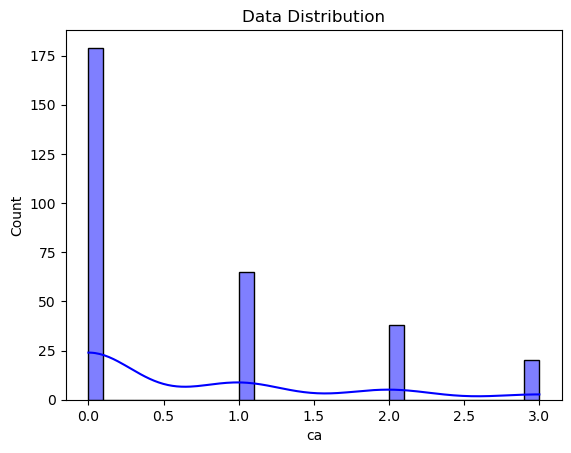

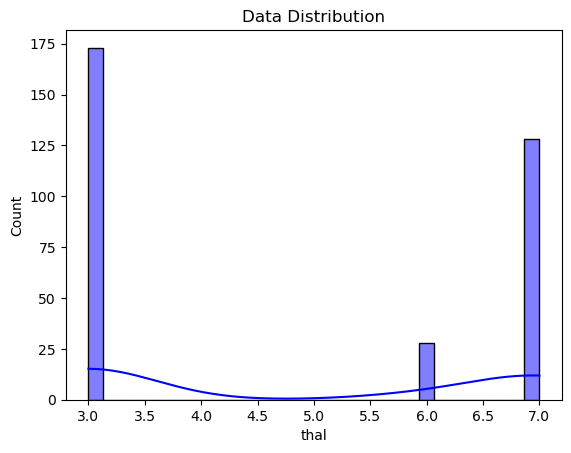

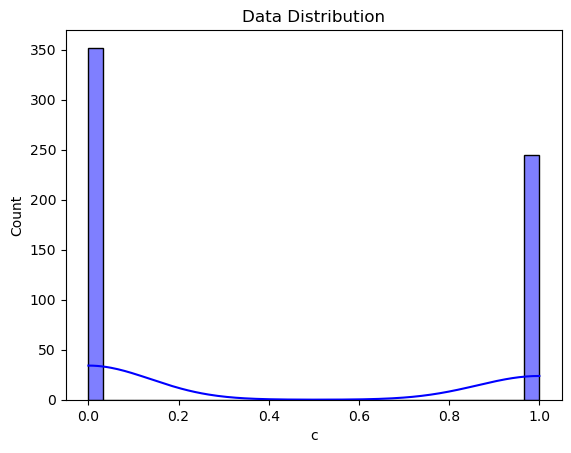

In [23]:
#define a functoin for distribute of data by histplot

def show_dist(dt):
    for i in dt.columns:
        sns.histplot(dt[i], bins=30, kde=True, color='blue')
        plt.title('Data Distribution')
        plt.show()

show_dist(df)  

In [25]:
#define the each feature that how to manage the outliers

handleOutlierType={'col':df.columns,
         'type':['mode','none','none','median','mean','none','lu','mean','none','lu','none','none','none','none']}

handleOutlierType=pd.DataFrame(handleOutlierType)
handleOutlierType  

col    type
0                     age    mode
1                     sex    none
2              chest pain    none
3          blood pressure  median
4            cholestoral     mean
5             blood sugar    none
6   electrocardiographic       lu
7              heart rate    mean
8        exercise induced    none
9             depression       lu
10                  slope    none
11                     ca    none
12                   thal    none
13                      c    none

In [27]:
#define a functoin for manage the outliers

def manage_outliers():
    for i in df.columns:
        # Perform Kolmogorov-Smirnov Test
        stat, p_value = kstest(df[i], 'norm')
        typeManage=handleOutlierType.loc[handleOutlierType['col'] == i, 'type'].values[0] 
        
        if p_value > 0.05:
            print(i,": Normal ")
            L = df[i].median() - 3 * df[i].std()
            U = df[i].median() + 3 * df[i].std()
            
        else:
            print(i,": Not Normal ")
            q1 = df[i].quantile(0.25)
            q3 = df[i].quantile(0.75)
            iqr = q3-q1
            L = q1 - 1.5 * iqr
            U = q3 + 1.5 * iqr
           
        
        if  typeManage=='mode':
            repValue=st.mode(df[i])
        elif typeManage=='mean':
            repValue=np.mean(df[i])
        elif typeManage=='median':
            repValue=np.median(df[i])
        elif typeManage=='lu':
            repValue=np.clip(df[i],L,U)
        else:
            repValue=df[i]
            
        df[i] = np.where((df[i]<L) | (df[i]>U), repValue, df[i])
        
manage_outliers()
df

age : Not Normal 
sex : Not Normal 
chest pain : Not Normal 
blood pressure : Not Normal 
cholestoral  : Not Normal 
blood sugar : Not Normal 
electrocardiographic  : Not Normal 
heart rate : Not Normal 
exercise induced : Not Normal 
depression  : Not Normal 
slope : Not Normal 
ca : Not Normal 
thal : Not Normal 
c : Not Normal 


age  sex  chest pain  blood pressure  cholestoral   blood sugar  \
0     63    1           1           145.0    233.000000          1.0   
1     37    1           3           130.0    250.000000          0.0   
2     41    0           2           130.0    204.000000          0.0   
3     56    1           2           120.0    236.000000          0.0   
4     57    0           4           120.0    354.000000          0.0   
..   ...  ...         ...             ...           ...          ...   
592   52    1           4           140.0    266.000000          0.0   
593   43    1           4           140.0    288.000000          0.0   
594   41    1           4           120.0    336.000000          0.0   
595   44    1           4           135.0    248.036649          0.0   
596   49    1           4           150.0    222.000000          0.0   

     electrocardiographic   heart rate  exercise induced  depression   slope  \
0                      2.0       150.0               0.0          2.3    3.0   
1                      0.0       187.0               0.0          3.5    3.0   
2                      2.0       172.0               0.0          1.4    1.0   
3                      0.0       178.0               0.0          0.8    1.0   
4                      0.0       163.0               1.0          0.6    1.0   
..                     ...         ...               ...          ...    ...   
592                    0.0       134.0               1.0          2.0    2.0   
593                    0.0       135.0               1.0          2.0    2.0   
594                    0.0       118.0               1.0          3.0    2.0   
595                    0.0       135.0               0.0          0.0    NaN   
596                    0.0       122.0               0.0          2.0    2.0   

      ca  thal  c  
0    0.0   6.0  0  
1    0.0   3.0  0  
2    0.0   3.0  0  
3    0.0   3.0  0  
4    0.0   3.0  0  
..   ...   ... ..  
592  NaN   NaN  1  
593  NaN   NaN  1  
594  NaN   NaN  1  
595  NaN   NaN  1  
596  NaN   NaN  1  

[597 rows x 14 columns]

<div style="line-height:300%;">
    <font face="arial" size=3 color=black>
        - Manage the missing data

In [29]:
#define a function for detect of numbers of missing data and percentage of all

def detect_missing_percent(dt):
        S=dt.isnull().sum()
        P=S/len(dt) * 100
        missing_data_df = pd.DataFrame({
            'Sum of Missing': S,
            'Percentage of Missing (%)': P
        })
        print(missing_data_df)

detect_missing_percent(df) 

                       Sum of Missing  Percentage of Missing (%)
age                                 0                   0.000000
sex                                 0                   0.000000
chest pain                          0                   0.000000
blood pressure                     18                   3.015075
cholestoral                        24                   4.020101
blood sugar                         8                   1.340034
electrocardiographic                1                   0.167504
heart rate                          2                   0.335008
exercise induced                    1                   0.167504
depression                          0                   0.000000
slope                             190                  31.825796
ca                                295                  49.413735
thal                              268                  44.891122
c                                   0                   0.000000


In [31]:
#determine each feature that how to manage of missing data

handleMissingType={'col':df.columns,
         'type':['mode','mode','mode','median','knn','mode','mean','median','median','median','knn','del','mode','mode']}

handleMissingType=pd.DataFrame(handleMissingType)
handleMissingType    

col    type
0                     age    mode
1                     sex    mode
2              chest pain    mode
3          blood pressure  median
4            cholestoral      knn
5             blood sugar    mode
6   electrocardiographic     mean
7              heart rate  median
8        exercise induced  median
9             depression   median
10                  slope     knn
11                     ca     del
12                   thal    mode
13                      c    mode

In [33]:
#define a function for manage of missing data

def manage_missing():
    for i in df.columns:
        typeManage=handleMissingType.loc[handleMissingType['col'] == i, 'type'].values[0]         
        
        if  typeManage=='mode':
             df[i]=df[i].fillna(df[i].mode()[0])
        elif typeManage=='mean':
             df[i]=df[i].fillna(df[i].mean())
        elif typeManage=='median':
             df[i]=df[i].fillna(df[i].median())
        elif typeManage=='del':
             del df[i]
        else:
            imputer = KNNImputer(n_neighbors=3)
            df[i] = imputer.fit_transform(df[[i]])
            
            
manage_missing() 
df

age  sex  chest pain  blood pressure  cholestoral   blood sugar  \
0     63    1           1           145.0    233.000000          1.0   
1     37    1           3           130.0    250.000000          0.0   
2     41    0           2           130.0    204.000000          0.0   
3     56    1           2           120.0    236.000000          0.0   
4     57    0           4           120.0    354.000000          0.0   
..   ...  ...         ...             ...           ...          ...   
592   52    1           4           140.0    266.000000          0.0   
593   43    1           4           140.0    288.000000          0.0   
594   41    1           4           120.0    336.000000          0.0   
595   44    1           4           135.0    248.036649          0.0   
596   49    1           4           150.0    222.000000          0.0   

     electrocardiographic   heart rate  exercise induced  depression   \
0                      2.0       150.0               0.0          2.3   
1                      0.0       187.0               0.0          3.5   
2                      2.0       172.0               0.0          1.4   
3                      0.0       178.0               0.0          0.8   
4                      0.0       163.0               1.0          0.6   
..                     ...         ...               ...          ...   
592                    0.0       134.0               1.0          2.0   
593                    0.0       135.0               1.0          2.0   
594                    0.0       118.0               1.0          3.0   
595                    0.0       135.0               0.0          0.0   
596                    0.0       122.0               0.0          2.0   

        slope  thal  c  
0    3.000000   6.0  0  
1    3.000000   3.0  0  
2    1.000000   3.0  0  
3    1.000000   3.0  0  
4    1.000000   3.0  0  
..        ...   ... ..  
592  2.000000   3.0  1  
593  2.000000   3.0  1  
594  2.000000   3.0  1  
595  1.675676   3.0  1  
596  2.000000   3.0  1  

[597 rows x 13 columns]

<div style="line-height:300%;">
	<font face="arial" size=5 color=black>
        Split features with target

In [35]:
x = df.drop("c", axis=1)
y = df.c


<div style="line-height:300%;">
	<font face="arial" size=5 color=black>
Show features that have correlation greater than 50% with eachothers

In [37]:
#define a function 

def corrX(dt):
    correlation_matrix = dt.corr()
    threshold = 0.5
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):  # Avoid duplicate pairs and self-correlation
            feature1 = correlation_matrix.columns[i]
            feature2 = correlation_matrix.columns[j]
            correlation_value = correlation_matrix.iloc[i, j]

            # Check if the absolute correlation is greater than the threshold
            if abs(correlation_value) > threshold:
                print(f"{feature1} and {feature2}: {correlation_value:.2f}")
    print('Correlation of features with greater than 50%👆')    
                             
corrX(x)     

Correlation of features with greater than 50%👆


<div style="line-height:300%;">
	<font face="arial" size=3 color=black>
If features have correlation greater than 50% with eachother then define a new feature and remove them

<div style="line-height:300%;">
	<font face="arial" size=5 color=black>
        Modeling

<div style="line-height:300%;">
	<font face="arial" size=3 color=black>
        Split the test and train

In [39]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(x , y , test_size = 0.2, random_state= 0, stratify=y )  

print(Xtrain.shape)
print(Xtest.shape)
df

(477, 12)
(120, 12)


age  sex  chest pain  blood pressure  cholestoral   blood sugar  \
0     63    1           1           145.0    233.000000          1.0   
1     37    1           3           130.0    250.000000          0.0   
2     41    0           2           130.0    204.000000          0.0   
3     56    1           2           120.0    236.000000          0.0   
4     57    0           4           120.0    354.000000          0.0   
..   ...  ...         ...             ...           ...          ...   
592   52    1           4           140.0    266.000000          0.0   
593   43    1           4           140.0    288.000000          0.0   
594   41    1           4           120.0    336.000000          0.0   
595   44    1           4           135.0    248.036649          0.0   
596   49    1           4           150.0    222.000000          0.0   

     electrocardiographic   heart rate  exercise induced  depression   \
0                      2.0       150.0               0.0          2.3   
1                      0.0       187.0               0.0          3.5   
2                      2.0       172.0               0.0          1.4   
3                      0.0       178.0               0.0          0.8   
4                      0.0       163.0               1.0          0.6   
..                     ...         ...               ...          ...   
592                    0.0       134.0               1.0          2.0   
593                    0.0       135.0               1.0          2.0   
594                    0.0       118.0               1.0          3.0   
595                    0.0       135.0               0.0          0.0   
596                    0.0       122.0               0.0          2.0   

        slope  thal  c  
0    3.000000   6.0  0  
1    3.000000   3.0  0  
2    1.000000   3.0  0  
3    1.000000   3.0  0  
4    1.000000   3.0  0  
..        ...   ... ..  
592  2.000000   3.0  1  
593  2.000000   3.0  1  
594  2.000000   3.0  1  
595  1.675676   3.0  1  
596  2.000000   3.0  1  

[597 rows x 13 columns]

<div style="line-height:300%;">
	<font face="arial" size=3 color=black>
        - Standardization

In [41]:
#define a function for Standardization by MinMaxScaler

def standardization(x):
    for i in df.columns:
        minmax_scale = MinMaxScaler().fit(x)
        return minmax_scale.transform(x)
        


In [43]:
#Standardization for train and test data

Xtrain_Scaled=standardization(Xtrain) 
Xtest_Scaled=standardization(Xtest) 

print(Xtrain_Scaled.shape)
print(Xtest_Scaled.shape)

(477, 12)
(120, 12)


In [45]:
#define a function for prediction model/test data

def ModelPredTest(modelName):
    modelName.fit(Xtrain_Scaled, Ytrain)
    return modelName.predict(Xtest_Scaled) 

In [47]:
#define a function for prediction model/train data

def ModelPredTrain(modelName):
    modelName.fit(Xtrain_Scaled, Ytrain)
    return modelName.predict(Xtrain_Scaled) 

<div style="line-height:300%;">
	<font face="arial" size=4 color=black>
        <b>
        - Predict of models

In [49]:
#predict by RandomForest

predRandomF_test = ModelPredTest(RandomForestClassifier())
print('test accuracy: ', accuracy_score(Ytest,predRandomF_test) )
predRandomF_train = ModelPredTrain(RandomForestClassifier())
print('train accuracy: ',accuracy_score(Ytrain,predRandomF_train))            

test accuracy:  0.8666666666666667
train accuracy:  1.0


In [51]:
#predict by LogisticRegression

predLR_test =ModelPredTest(LogisticRegression())
print('test accuracy: ', accuracy_score(Ytest,predLR_test) )
predLR_train = ModelPredTrain(LogisticRegression())
print('train accuracy: ',accuracy_score(Ytrain,predLR_train))            

test accuracy:  0.8666666666666667
train accuracy:  0.8259958071278826


In [53]:
#predict by XGBoost

predXgb_test =ModelPredTest(xgb.XGBClassifier())
print('test accuracy: ', accuracy_score(Ytest,predXgb_test) )
predXgb_train = ModelPredTrain(xgb.XGBClassifier())
print('train accuracy: ',accuracy_score(Ytrain,predXgb_train))            

test accuracy:  0.8166666666666667
train accuracy:  1.0


In [55]:
#predict by DecisionTree

predDecisionT_test = ModelPredTest(DecisionTreeClassifier())
print('test accuracy: ',(predDecisionT_test == Ytest).mean() )
predDecisionT_train = ModelPredTrain(DecisionTreeClassifier())
print('train accuracy: ',(predDecisionT_train == Ytrain).mean() )            

test accuracy:  0.825
train accuracy:  1.0


In [57]:
#predict by KNeighbors

predKnn_test = ModelPredTest(KNeighborsClassifier())
print('test accuracy: ',(predKnn_test == Ytest).mean()) 
predKnn_train = ModelPredTrain(KNeighborsClassifier())
print('train accuracy: ',(predKnn_train == Ytrain).mean())                   

test accuracy:  0.85
train accuracy:  0.8532494758909853


In [59]:
#predict by Nuaral Network

predMlp_test = ModelPredTest(MLPClassifier(max_iter=500))
print('test accuracy: ',(predMlp_test == Ytest).mean() )
predMlp_train = ModelPredTrain(MLPClassifier(max_iter=500))
print('train accuracy: ',(predMlp_train == Ytrain).mean() )                    

test accuracy:  0.8916666666666667
train accuracy:  0.859538784067086


In [61]:
#predict by SVM

predSvm_test = ModelPredTest(SVC())
print('test accuracy: ',(predSvm_test == Ytest).mean())
predSvm_train = ModelPredTrain(SVC())
print('train accuracy: ',(predSvm_train == Ytrain).mean())                      

test accuracy:  0.8666666666666667
train accuracy:  0.8553459119496856


In [63]:
#predict by GaussianNB

predGaussianNB_test = ModelPredTest(GaussianNB())
print('test accuracy: ',(predGaussianNB_test == Ytest).mean() )
predGaussianNB_train = ModelPredTrain(GaussianNB())
print('train accuracy: ',(predGaussianNB_train == Ytrain).mean() )                  

test accuracy:  0.8666666666666667
train accuracy:  0.8238993710691824


In [65]:
#predict by MultinomialNB

predMultinomialNB_test = ModelPredTest(MultinomialNB())
print('test accuracy: ',(predMultinomialNB_test == Ytest).mean()) 
predMultinomialNB_train = ModelPredTrain(MultinomialNB())
print('train accuracy: ',(predMultinomialNB_train == Ytrain).mean())                   

test accuracy:  0.85
train accuracy:  0.8050314465408805


<div style="line-height:300%;">
	<font face="arial" size=3 color=black>
-- HyperParameter

In [68]:
# Find the best parameter for RandomForest model

RandomForrestModel = RandomForestClassifier()

paramRandomF =  {'n_estimators': [50,100, 200, 300],      
                      'max_depth': [10, 20,30, None],            
                      'max_features': ['auto', 'sqrt', 'log2'],  
                      'bootstrap': [True, False],           
                      'criterion': ['gini', 'entropy'],      
                      'class_weight': [None, 'balanced'],
                      'min_samples_split': [2, 5, 10]
                     } 


GS = GridSearchCV(RandomForrestModel, paramRandomF ,cv = 3, scoring = "accuracy",n_jobs=-1,verbose=2)
GS.fit(Xtrain_Scaled, Ytrain)
GS.best_params_  

Fitting 3 folds for each of 1152 candidates, totalling 3456 fits


{'bootstrap': True,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_split': 5,
 'n_estimators': 50}

In [70]:
#The best score
GS.best_score_

0.8301886792452832

In [137]:
#predict test and trian by RandomForest with use the hyperParameter

RFModel=RandomForestClassifier(max_depth=10,
 max_features= 'sqrt',
 min_samples_split= 5,
 n_estimators= 50,
 bootstrap =True,
 class_weight= 'balanced',
 criterion= 'gini')

predRF_test= ModelPredTest(RFModel)
RpredRF_test=(predRF_test == Ytest).mean()
print('test accuracy: ',RpredRF_test)

predRF_train= ModelPredTrain(RFModel)
RpredRF_train=(predRF_train == Ytrain).mean()
print('train accuracy: ',RpredRF_train)

test accuracy:  0.8666666666666667
train accuracy:  0.960167714884696


In [74]:
# Find the best parameter for LogisticRegression model

LR_model = LogisticRegression()

paramLR = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  
    'C': [0.01, 0.1, 1, 10, 100],                   
    'solver': ['lbfgs', 'liblinear', 'saga'],        
    'max_iter': [100, 200, 500],                      
    'class_weight': [None, 'balanced'],             
}

GS = GridSearchCV(LR_model, paramLR ,cv = 5, scoring = "accuracy",n_jobs=-1,verbose=2)
GS.fit(Xtrain_Scaled, Ytrain)
GS.best_params_  

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


{'C': 1,
 'class_weight': None,
 'max_iter': 100,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [120]:
#The best score
GS.best_score_

0.8175438596491228

In [76]:
#predict test and trian by LogisticRegression with use the hyperParameter

LRModel=LogisticRegression(C= 1,
 class_weight= None,
 max_iter= 100,
 penalty= 'l1',
 solver= 'liblinear')

predLR_test= ModelPredTest(LRModel)
RpredLR_test=(predLR_test == Ytest).mean()
print('test accuracy: ',RpredLR_test)

predLR_train= ModelPredTrain(LRModel)
RpredLR_train=(predLR_train == Ytrain).mean()
print('train accuracy: ',RpredLR_train)

test accuracy:  0.875
train accuracy:  0.8301886792452831


In [78]:
# Find the best parameter for XGBoost model

Xgb_model = xgb.XGBClassifier()

paramXgb = {
     'n_estimators': [100, 200, 300],        
    'learning_rate': [0.01, 0.1, 0.2],        
    'max_depth': [3, 5, 7],                    
    'min_child_weight': [1, 3],            
    'gamma': [0, 0.1],                               
    'colsample_bytree': [0.6, 0.8],      
    'reg_alpha': [0, 0.1, 0.5],            
    'reg_lambda': [1, 1.5],                
    'scale_pos_weight': [1, 3],             
    'verbosity': [0, 1]            
}

GS = GridSearchCV(Xgb_model, paramXgb ,cv = 5, scoring = "accuracy",n_jobs=-1,verbose=2)
GS.fit(Xtrain_Scaled, Ytrain)
GS.best_params_  

Fitting 5 folds for each of 5184 candidates, totalling 25920 fits


{'colsample_bytree': 0.8,
 'gamma': 0.1,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 100,
 'reg_alpha': 0,
 'reg_lambda': 1.5,
 'scale_pos_weight': 1,
 'verbosity': 0}

In [83]:
#The best score
GS.best_score_

0.8134429824561404

In [85]:
#predict test and trian by XGBoost with use the hyperParameter

XGBModel=xgb.XGBClassifier(colsample_bytree= 0.8,
 gamma= 0.1,
 learning_rate= 0.1,
 max_depth= 3,
 min_child_weight= 1,
 n_estimators= 100,
 reg_alpha= 0,
 reg_lambda= 1.5,
 scale_pos_weight= 1,
 verbosity= 0)

predXGB_test= ModelPredTest(XGBModel)
RpredXGB_test=(predXGB_test == Ytest).mean()
print('test accuracy: ',RpredXGB_test)

predXGB_train= ModelPredTrain(XGBModel)
RpredXGB_train=(predXGB_train == Ytrain).mean()
print('train accuracy: ',RpredXGB_train)

test accuracy:  0.875
train accuracy:  0.9161425576519916


In [87]:
# Find the best parameter for DecisionTree model

dt_model = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],         
    'splitter': ['best', 'random'],          
    'max_depth': [None, 10, 20, 30],          
    'min_samples_split': [2, 5, 10],          
    'min_samples_leaf': [1, 2, 4],            
    'max_features': [None, 'auto', 'sqrt', 'log2'],  
    'class_weight': [None, 'balanced'],}      

grid_search = GridSearchCV(estimator=dt_model,
                           param_grid=param_grid,
                           cv=10,         
                           scoring='accuracy',  
                           n_jobs=-1,   
                           verbose=2)

grid_search.fit(Xtrain_Scaled, Ytrain)

grid_search.best_params_ 


Fitting 10 folds for each of 1152 candidates, totalling 11520 fits


{'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'splitter': 'random'}

In [89]:
#The best score
grid_search.best_score_

0.8175975177304965

In [91]:
#predict test and trian by DecisionTree with use the hyperParameter

DtModel=DecisionTreeClassifier(class_weight= None,
 criterion= 'entropy',
 max_depth= 10,
 max_features= 'log2',
 min_samples_leaf= 4,
 min_samples_split= 10,
 splitter= 'random')

predDt_test= ModelPredTest(DtModel)
RpredDt_test=(predDt_test == Ytest).mean()
print('test accuracy: ',RpredDt_test)

predDt_train= ModelPredTrain(DtModel)
RpredDt_train=(predDt_train == Ytrain).mean()
print('train accuracy: ',RpredDt_train)

test accuracy:  0.825
train accuracy:  0.8197064989517819


In [93]:
# Find the best parameter for KNeighbors model

knn_model = KNeighborsClassifier()

param_grid = {
     'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
    'leaf_size': [20, 30, 40],
    'metric': ['minkowski', 'euclidean', 'manhattan']}      

grid_search = GridSearchCV(estimator=knn_model,
                           param_grid=param_grid,
                           cv=5,         
                           scoring='accuracy',  
                           n_jobs=-1,   
                           verbose=2)

grid_search.fit(Xtrain_Scaled, Ytrain)

grid_search.best_params_ 

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


{'algorithm': 'auto',
 'leaf_size': 20,
 'metric': 'minkowski',
 'n_neighbors': 9,
 'p': 1,
 'weights': 'distance'}

In [95]:
#The best score
grid_search.best_score_

0.8007675438596491

In [97]:
#predict test and trian by KNeighbors with use the hyperParameter

KnnModel=KNeighborsClassifier(algorithm='auto',
 leaf_size= 20,
 metric= 'minkowski',
 n_neighbors= 9,
 p= 1,
 weights= 'distance')

predKnn_test= ModelPredTest(KnnModel)
RpredKnn_test=(predKnn_test == Ytest).mean()
print('test accuracy: ',RpredKnn_test)

predKnn_train= ModelPredTrain(KnnModel)
RpredKnn_train=(predKnn_train == Ytrain).mean()
print('train accuracy: ',RpredKnn_train)

test accuracy:  0.8416666666666667
train accuracy:  1.0


In [99]:
# Find the best parameter for NuaralNetwork model

mlp_model = MLPClassifier()

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (50, 100, 50)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [200, 500]
}
     

grid_search = GridSearchCV(estimator=mlp_model,
                           param_grid=param_grid,
                           cv=5,         
                           scoring='accuracy',  
                           n_jobs=-1,   
                           verbose=2)

grid_search.fit(Xtrain_Scaled, Ytrain)

grid_search.best_params_ 


Fitting 5 folds for each of 432 candidates, totalling 2160 fits


{'activation': 'relu',
 'alpha': 0.01,
 'hidden_layer_sizes': (50, 100, 50),
 'learning_rate': 'adaptive',
 'max_iter': 500,
 'solver': 'sgd'}

In [103]:
#The best score
grid_search.best_score_

0.825921052631579

In [105]:
#predict test and trian by Nuaral Network with use the hyperParameter

mlpModel=MLPClassifier(activation = 'relu',
                    alpha = 0.01,
                    hidden_layer_sizes = (50, 100, 50),
                    learning_rate = 'adaptive',
                    max_iter = 500,
                    solver = 'sgd')

predmlp_test= ModelPredTest(mlpModel)
Rpredmlp_test=(predmlp_test == Ytest).mean()
print('test accuracy: ',Rpredmlp_test)

predmlp_train= ModelPredTrain(mlpModel)
Rpredmlp_train=(predmlp_train == Ytrain).mean()
print('train accuracy: ',Rpredmlp_train)

test accuracy:  0.8666666666666667
train accuracy:  0.8448637316561844


In [107]:
# Find the best parameter for SVM model

svm_model = SVC()

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4], 
    'gamma': ['auto', 0.001, 0.01, 0.1, 1],
    'max_iter': [1000, 5000, 10000]
}
     

grid_search = GridSearchCV(estimator=svm_model,
                           param_grid=param_grid,
                           cv=10,         
                           scoring='accuracy',  
                           n_jobs=-1,   
                           verbose=2)

grid_search.fit(Xtrain_Scaled, Ytrain)

grid_search.best_params_ 


Fitting 10 folds for each of 720 candidates, totalling 7200 fits


{'C': 10, 'degree': 2, 'gamma': 'auto', 'kernel': 'sigmoid', 'max_iter': 1000}

In [109]:
#The best score
grid_search.best_score_

0.8174645390070922

In [115]:
#predict test and trian by SVM with use the hyperParameter

svmModel=SVC(C= 10, degree=2, gamma='auto', kernel= 'sigmoid', max_iter= 1000)

predsvm_test= ModelPredTest(svmModel)
Rpredsvm_test=(predsvm_test == Ytest).mean()
print('test accuracy: ',Rpredsvm_test)

predsvm_train= ModelPredTrain(svmModel)
Rpredsvm_train=(predsvm_train == Ytrain).mean()
print('train accuracy: ',Rpredsvm_train)

test accuracy:  0.8666666666666667
train accuracy:  0.8218029350104822


In [117]:
# Find the best parameter for GaussianNB model

Gnb_model = GaussianNB()

param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

     

grid_search = GridSearchCV(estimator=Gnb_model,
                           param_grid=param_grid,
                           cv=10,         
                           scoring='accuracy',  
                           n_jobs=-1,   
                           verbose=2)

grid_search.fit(Xtrain_Scaled, Ytrain)

grid_search.best_params_


Fitting 10 folds for each of 5 candidates, totalling 50 fits


{'var_smoothing': 1e-09}

In [119]:
#The best score
grid_search.best_score_

0.8154255319148935

In [121]:
#predict test and trian by GaussianNB with use the hyperParameter

GnbModel=GaussianNB(var_smoothing= 1e-09)

predGnb_test= ModelPredTest(GnbModel)
RpredGnb_test=(predGnb_test == Ytest).mean()
print('test accuracy: ',RpredGnb_test)

predGnb_train= ModelPredTrain(GnbModel)
RpredGnb_train=(predGnb_train == Ytrain).mean()
print('train accuracy: ',RpredGnb_train)

test accuracy:  0.8666666666666667
train accuracy:  0.8238993710691824


In [123]:
# Find the best parameter for MultinomialNB model

Mnb_model = MultinomialNB()

param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0],
    'fit_prior': [True, False]
}

     

grid_search = GridSearchCV(estimator=Mnb_model,
                           param_grid=param_grid,
                           cv=10,         
                           scoring='accuracy',  
                           n_jobs=-1,   
                           verbose=2)

grid_search.fit(Xtrain_Scaled, Ytrain)

grid_search.best_params_ 


Fitting 10 folds for each of 10 candidates, totalling 100 fits


{'alpha': 5.0, 'fit_prior': True}

In [125]:
#The best score
grid_search.best_score_

0.7921985815602837

In [127]:
#predict test and trian by MultinomialNB with use the hyperParameter

MnbModel=MultinomialNB(alpha= 5.0, fit_prior= True)

predMnb_test= ModelPredTest(MnbModel)
RpredMnb_test=(predMnb_test == Ytest).mean()
print('test accuracy: ',RpredMnb_test)

predMnb_train= ModelPredTrain(MnbModel)
RpredMnb_train=(predMnb_train == Ytrain).mean()
print('train accuracy: ',RpredMnb_train)

test accuracy:  0.8416666666666667
train accuracy:  0.8029350104821803


<div style="line-height:300%;">
	<font face="B yekan" size=3 color=black>
-- Bagging

In [141]:
 #define a function for predict models by use bagging/ predict test
def BaggingModelPredTest(modelName,Nestimators=50,maxSamples=0.9,randomState=2020):
    BagModel = BaggingClassifier(estimator=modelName, n_estimators=Nestimators, max_samples=maxSamples,
                                 random_state=randomState)
    BagModel.fit(Xtrain_Scaled, Ytrain)
    BagPred= BagModel.predict(Xtest_Scaled)
    return accuracy_score(Ytest,BagPred)                                

In [143]:
 #define a function for predict models by use bagging/ predict train
def BaggingModelPredTrain(modelName,Nestimators=50,maxSamples=0.9,randomState=2020):
    BagModel = BaggingClassifier(estimator=modelName, n_estimators=Nestimators, max_samples=maxSamples,
                                 random_state=randomState)
    BagModel.fit(Xtrain_Scaled, Ytrain)
    BagPred= BagModel.predict(Xtrain_Scaled)
    return accuracy_score(Ytrain,BagPred)                                

In [145]:
 #RF Model with Bagging
BagRfTest=BaggingModelPredTest(RFModel,20,0.8,42)
BagRfTrain=BaggingModelPredTrain(RFModel,20,0.8,42)
print('Bagging test accuracy: ',BagRfTest)
print('Bagging train accuracy: ',BagRfTrain)           

Bagging test accuracy:  0.8666666666666667
Bagging train accuracy:  0.9056603773584906


In [147]:
#LR Model with Bagging
BagLrTest=BaggingModelPredTest(LRModel,50,0.8,42)
BagLrTrain=BaggingModelPredTrain(LRModel,50,0.8,42)
print('Bagging test accuracy: ',BagLrTest)
print('Bagging train accuracy: ',BagLrTrain)              

Bagging test accuracy:  0.875
Bagging train accuracy:  0.8322851153039832


In [149]:
#XGB Model with Bagging
BagXgbTest=BaggingModelPredTest(XGBModel,50,0.7,0)
BagXgbTrain=BaggingModelPredTrain(XGBModel,50,0.7,0)
print('Bagging test accuracy: ',BagXgbTest)
print('Bagging train accuracy: ',BagXgbTrain)              

Bagging test accuracy:  0.875
Bagging train accuracy:  0.8930817610062893


In [151]:
 #DT Model with Bagging
BagDtTest=BaggingModelPredTest(DtModel)
BagDtTrain=BaggingModelPredTrain(DtModel)
print('Bagging test accuracy: ',BagDtTest)
print('Bagging train accuracy: ',BagDtTrain)           

Bagging test accuracy:  0.875
Bagging train accuracy:  0.8511530398322851


In [153]:
#Knn Model with Bagging
BagKnnTest=BaggingModelPredTest(KnnModel)
BagKnnTrain=BaggingModelPredTrain(KnnModel)
print('Bagging test accuracy: ',BagKnnTest)
print('Bagging train accuracy: ',BagKnnTrain)            

Bagging test accuracy:  0.8583333333333333
Bagging train accuracy:  0.9958071278825996


In [155]:
 #NN Model with Bagging
BagMlpTest=BaggingModelPredTest(mlpModel)
BagMlpTrain=BaggingModelPredTrain(mlpModel)
print('Bagging test accuracy: ',BagMlpTest)
print('Bagging train accuracy: ',BagMlpTrain)           

Bagging test accuracy:  0.8666666666666667
Bagging train accuracy:  0.8364779874213837


In [157]:
#Svm Model with Bagging
BagSvmTest=BaggingModelPredTest(svmModel)
BagSvmTrain=BaggingModelPredTrain(svmModel)
print('Bagging test accuracy: ',BagSvmTest)
print('Bagging train accuracy: ',BagSvmTrain)            

Bagging test accuracy:  0.85
Bagging train accuracy:  0.8259958071278826


In [159]:
 #Gnb Model with Bagging
BagGnbTest=BaggingModelPredTest(GnbModel)
BagGnbTrain=BaggingModelPredTrain(GnbModel)
print('Bagging test accuracy: ',BagGnbTest)
print('Bagging train accuracy: ',BagGnbTrain)           

Bagging test accuracy:  0.8666666666666667
Bagging train accuracy:  0.8238993710691824


In [161]:
 #Mnb Model with Bagging
BagMnbTest=BaggingModelPredTest(MnbModel)
BagMnbTrain=BaggingModelPredTrain(MnbModel)
print('Bagging test accuracy: ',BagMnbTest)
print('Bagging train accuracy: ',BagMnbTrain)           

Bagging test accuracy:  0.8416666666666667
Bagging train accuracy:  0.80083857442348


<div style="line-height:300%;">
	<font face="B yekan" size=3 color=black>
-- CrossVal

In [163]:
#RandomForest
scores = cross_val_score(RFModel, Xtrain_Scaled, Ytrain , cv = 10, scoring = 'f1' ) 
scores2 = cross_val_score(RFModel, Xtrain_Scaled, Ytrain , cv = 10, scoring = 'accuracy' )
CV_RF=scores2.mean()
print(scores.mean())
print(CV_RF)  

0.737890734438722
0.8008865248226951


In [165]:
#LogisticRegression
scores = cross_val_score(LRModel, Xtrain_Scaled, Ytrain , cv = 10, scoring = 'f1' ) 
scores2 = cross_val_score(LRModel, Xtrain_Scaled, Ytrain , cv = 10, scoring = 'accuracy' )
CV_LR=scores2.mean()
print(scores.mean())
print(CV_LR)  

0.7758613008613009
0.8238475177304965


In [167]:
#XGBoost
scores = cross_val_score(XGBModel, Xtrain_Scaled, Ytrain , cv = 10, scoring = 'f1' ) 
scores2 = cross_val_score(XGBModel, Xtrain_Scaled, Ytrain , cv = 10, scoring = 'accuracy' )
CV_XGB=scores2.mean()
print(scores.mean())
print(CV_XGB)  

0.7566357423863276
0.8030141843971631


In [169]:
 #Decision tree
scores = cross_val_score(DtModel, Xtrain_Scaled, Ytrain , cv = 10, scoring = 'f1' ) 
scores2 = cross_val_score(DtModel, Xtrain_Scaled, Ytrain , cv = 10, scoring = 'accuracy' )
CV_DT=scores2.mean()
print(scores.mean())
print(CV_DT) 

0.6907511726071565
0.786258865248227


In [171]:
 #Knn
scores = cross_val_score(KnnModel, Xtrain_Scaled, Ytrain , cv = 10, scoring = 'f1' ) 
scores2 = cross_val_score(KnnModel, Xtrain_Scaled, Ytrain , cv = 10, scoring = 'accuracy' )
CV_KNN=scores2.mean()
print(scores.mean())
print(CV_KNN) 

0.7458287293203854
0.8008421985815604


In [173]:
#Nuaral Network
scores = cross_val_score(mlpModel, Xtrain_Scaled, Ytrain , cv = 10, scoring = 'f1' ) 
scores2 = cross_val_score(mlpModel, Xtrain_Scaled, Ytrain , cv = 10, scoring = 'accuracy' )
CV_NN=scores2.mean()
print(scores.mean())
print(CV_NN)  

0.7763897733024819
0.823758865248227


In [175]:
#Svm
scores = cross_val_score(svmModel, Xtrain_Scaled, Ytrain , cv = 10, scoring = 'f1' ) 
scores2 = cross_val_score(svmModel, Xtrain_Scaled, Ytrain , cv = 10, scoring = 'accuracy' )
CV_SVM=scores2.mean()
print(scores.mean())
print(CV_SVM)  

0.7714795736361847
0.8174645390070922


In [177]:
#Gnb
scores = cross_val_score(GnbModel, Xtrain_Scaled, Ytrain , cv = 10, scoring = 'f1' ) 
scores2 = cross_val_score(GnbModel, Xtrain_Scaled, Ytrain , cv = 10, scoring = 'accuracy' )
CV_GNB=scores2.mean()
print(scores.mean())
print(CV_GNB)  

0.7780004157755896
0.8154255319148935


In [179]:
#Mnb
scores = cross_val_score(MnbModel, Xtrain_Scaled, Ytrain , cv = 10, scoring = 'f1' ) 
scores2 = cross_val_score(MnbModel, Xtrain_Scaled, Ytrain , cv = 10, scoring = 'accuracy' )
CV_MNB=scores2.mean()
print(scores.mean())
print(CV_MNB)  

0.7237966537966538
0.7921985815602837


<div style="line-height:300%;">
	<font face="B yekan" size=3 color=black>
--Kfold

In [181]:
#RandomForest
kf = KFold(10, shuffle = True, random_state = 2021)
kf_RF=cross_val_score(RFModel, Xtrain_Scaled, Ytrain , cv = kf, scoring = 'accuracy' ).mean() 
kf_RF

0.8092641843971633

In [183]:
#LogisticRegression
kf = KFold(10, shuffle = True, random_state = 2021)
kf_LR=cross_val_score(LRModel, Xtrain_Scaled, Ytrain , cv = kf, scoring = 'accuracy' ).mean() 
kf_LR

0.8133421985815603

In [185]:
#XGBoost
kf = KFold(10, shuffle = True, random_state = 2021)
kf_XGB=cross_val_score(XGBModel, Xtrain_Scaled, Ytrain , cv = kf, scoring = 'accuracy' ).mean() 
kf_XGB

0.7968528368794325

In [187]:
#Decision Tree
kf = KFold(10, shuffle = True, random_state = 2021)
kf_DT=cross_val_score(DtModel, Xtrain_Scaled, Ytrain , cv = kf, scoring = 'accuracy' ).mean() 
kf_DT

0.7569148936170214

In [189]:
#Knn
kf = KFold(10, shuffle = True, random_state = 2021)
kf_KNN=cross_val_score(KnnModel, Xtrain_Scaled, Ytrain , cv = kf, scoring = 'accuracy' ).mean() 
kf_KNN

0.8070921985815603

In [191]:
#NuaralNetwork
kf = KFold(10, shuffle = True, random_state = 2021)
kf_NN=cross_val_score(mlpModel, Xtrain_Scaled, Ytrain , cv = kf, scoring = 'accuracy' ).mean() 
kf_NN

0.8154255319148938

In [193]:
#Svm
kf = KFold(10, shuffle = True, random_state = 2021)
kf_SVM=cross_val_score(svmModel, Xtrain_Scaled, Ytrain , cv = kf, scoring = 'accuracy' ).mean() 
kf_SVM

0.8049645390070923

In [195]:
#Gnb
kf = KFold(10, shuffle = True, random_state = 2021)
kf_GNB=cross_val_score(GnbModel, Xtrain_Scaled, Ytrain , cv = kf, scoring = 'accuracy' ).mean() 
kf_GNB

0.811258865248227

In [197]:
#Mnb
kf = KFold(10, shuffle = True, random_state = 2021)
kf_MNB=cross_val_score(MnbModel, Xtrain_Scaled, Ytrain , cv = kf, scoring = 'accuracy' ).mean() 
kf_MNB

0.7945478723404256

<div style="line-height:300%;">
	<font face="arial" size=5 color=black>
       Evaluation

In [199]:
#define a function for evaluate on the model
def EvaluationModel(Ytest, pred):
    acc = accuracy_score(Ytest, pred)
    rec = recall_score(Ytest, pred)
    pre = precision_score(Ytest, pred)
    fm = f1_score(Ytest, pred)
    conf = confusion_matrix(Ytest, pred)
    
    EvModel={'Type':['Accuracy','Recall','Precision','F1'],
             'Score':[acc,rec,pre,fm]}
    
    EvModel=pd.DataFrame(EvModel)
    print(classification_report(Ytest, pred))  
    print('confusion_matrix: \n',conf)
    return EvModel
 

In [201]:
#RF
EvaluationModel(Ytest, predRF_test) 

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        71
           1       0.90      0.76      0.82        49

    accuracy                           0.87       120
   macro avg       0.88      0.85      0.86       120
weighted avg       0.87      0.87      0.86       120

confusion_matrix: 
 [[67  4]
 [12 37]]


Type     Score
0   Accuracy  0.866667
1     Recall  0.755102
2  Precision  0.902439
3         F1  0.822222

In [203]:
#LR
EvaluationModel(Ytest, predLR_test) 

              precision    recall  f1-score   support

           0       0.86      0.94      0.90        71
           1       0.90      0.78      0.84        49

    accuracy                           0.88       120
   macro avg       0.88      0.86      0.87       120
weighted avg       0.88      0.88      0.87       120

confusion_matrix: 
 [[67  4]
 [11 38]]


Type     Score
0   Accuracy  0.875000
1     Recall  0.775510
2  Precision  0.904762
3         F1  0.835165

In [205]:
#XGB
EvaluationModel(Ytest, predXGB_test) 

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        71
           1       0.89      0.80      0.84        49

    accuracy                           0.88       120
   macro avg       0.88      0.86      0.87       120
weighted avg       0.88      0.88      0.87       120

confusion_matrix: 
 [[66  5]
 [10 39]]


Type     Score
0   Accuracy  0.875000
1     Recall  0.795918
2  Precision  0.886364
3         F1  0.838710

In [207]:
#DT
EvaluationModel(Ytest, predDt_test) 

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        71
           1       0.82      0.73      0.77        49

    accuracy                           0.82       120
   macro avg       0.82      0.81      0.82       120
weighted avg       0.82      0.82      0.82       120

confusion_matrix: 
 [[63  8]
 [13 36]]


Type     Score
0   Accuracy  0.825000
1     Recall  0.734694
2  Precision  0.818182
3         F1  0.774194

In [209]:
#Knn
EvaluationModel(Ytest, predKnn_test) 

              precision    recall  f1-score   support

           0       0.83      0.92      0.87        71
           1       0.86      0.73      0.79        49

    accuracy                           0.84       120
   macro avg       0.85      0.83      0.83       120
weighted avg       0.84      0.84      0.84       120

confusion_matrix: 
 [[65  6]
 [13 36]]


Type     Score
0   Accuracy  0.841667
1     Recall  0.734694
2  Precision  0.857143
3         F1  0.791209

In [211]:
#NN
EvaluationModel(Ytest, predmlp_test) 

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        71
           1       0.90      0.76      0.82        49

    accuracy                           0.87       120
   macro avg       0.88      0.85      0.86       120
weighted avg       0.87      0.87      0.86       120

confusion_matrix: 
 [[67  4]
 [12 37]]


Type     Score
0   Accuracy  0.866667
1     Recall  0.755102
2  Precision  0.902439
3         F1  0.822222

In [213]:
 #Svm
EvaluationModel(Ytest, predsvm_test)

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        71
           1       0.90      0.76      0.82        49

    accuracy                           0.87       120
   macro avg       0.88      0.85      0.86       120
weighted avg       0.87      0.87      0.86       120

confusion_matrix: 
 [[67  4]
 [12 37]]


Type     Score
0   Accuracy  0.866667
1     Recall  0.755102
2  Precision  0.902439
3         F1  0.822222

In [215]:
#Gnb
EvaluationModel(Ytest, predGnb_test) 

              precision    recall  f1-score   support

           0       0.86      0.93      0.89        71
           1       0.88      0.78      0.83        49

    accuracy                           0.87       120
   macro avg       0.87      0.85      0.86       120
weighted avg       0.87      0.87      0.87       120

confusion_matrix: 
 [[66  5]
 [11 38]]


Type     Score
0   Accuracy  0.866667
1     Recall  0.775510
2  Precision  0.883721
3         F1  0.826087

In [217]:
#Mnb
EvaluationModel(Ytest, predMnb_test) 

              precision    recall  f1-score   support

           0       0.81      0.96      0.88        71
           1       0.92      0.67      0.78        49

    accuracy                           0.84       120
   macro avg       0.86      0.82      0.83       120
weighted avg       0.85      0.84      0.84       120

confusion_matrix: 
 [[68  3]
 [16 33]]


Type     Score
0   Accuracy  0.841667
1     Recall  0.673469
2  Precision  0.916667
3         F1  0.776471

<div style="line-height:300%;">
	<font face="arial" size=5 color=black>
Result

In [219]:
Result={'Model':['RandomForest','LogisticRegression','Xgb','Decision Tree','Knn','Svm','Nuaral Network','Naive Bayse Gussian'
                 ,'Naive Bayse Multi'],
        'Accuracy/test':[RpredRF_test,RpredLR_test,RpredXGB_test,RpredDt_test,RpredKnn_test,Rpredsvm_test,Rpredmlp_test,RpredGnb_test
                         ,RpredMnb_test],
        'Accuracy/train':[RpredRF_train,RpredLR_train,RpredXGB_train,RpredDt_train,RpredKnn_train,Rpredsvm_train,Rpredmlp_train,RpredGnb_train,
                          RpredMnb_train],
        'Bagging/test':[BagRfTest,BagLrTest,BagXgbTest,BagDtTest,BagKnnTest,BagSvmTest,BagMlpTest,BagGnbTest,BagMnbTest],
        'Bagging/train':[BagRfTrain,BagLrTrain,BagXgbTrain,BagDtTrain,BagKnnTrain,BagSvmTrain,BagMlpTrain,BagGnbTrain,BagMnbTrain],
        'Cross Val':[CV_RF,CV_LR,CV_XGB,CV_DT,CV_KNN,CV_SVM,CV_NN,CV_GNB,CV_MNB],
        'Kfold':[kf_RF,kf_LR,kf_XGB,kf_DT,kf_KNN,kf_SVM,kf_NN,kf_GNB,kf_MNB]}

pd.DataFrame(Result)

Model  Accuracy/test  Accuracy/train  Bagging/test  \
0         RandomForest       0.866667        0.960168      0.866667   
1   LogisticRegression       0.875000        0.830189      0.875000   
2                  Xgb       0.875000        0.916143      0.875000   
3        Decision Tree       0.825000        0.819706      0.875000   
4                  Knn       0.841667        1.000000      0.858333   
5                  Svm       0.866667        0.821803      0.850000   
6       Nuaral Network       0.866667        0.844864      0.866667   
7  Naive Bayse Gussian       0.866667        0.823899      0.866667   
8    Naive Bayse Multi       0.841667        0.802935      0.841667   

   Bagging/train  Cross Val     Kfold  
0       0.905660   0.800887  0.809264  
1       0.832285   0.823848  0.813342  
2       0.893082   0.803014  0.796853  
3       0.851153   0.786259  0.756915  
4       0.995807   0.800842  0.807092  
5       0.825996   0.817465  0.804965  
6       0.836478   0.823759  0.815426  
7       0.823899   0.815426  0.811259  
8       0.800839   0.792199  0.794548